<a href="https://colab.research.google.com/github/FaisalRamadhan08/Analisis-Sentimen-Ulasan-Aplikasi-Shoppe-Big-Data/blob/main/Analisis_Sentimen_Ulasan_Aplikasi_Shopee_pada_google_play_store_Menggunakan_Metode_Klasifikasi_Algoritma_Multinomial_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Sentimen Ulasan Aplikasi Shopee di google play store Menggunakan Metode Klasifikasi Algoritma Naive Bayes

# scraping data

In [21]:
#Referensi: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/
#download library google-play-scraper
!pip install google-play-scraper

# Impor Library yang diperlukan

In [22]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [23]:
#scrape jumlah ulasan yang diinginkan
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.shopee.id',
    lang='id',  #disini kita mau men scrape data ulasan aplikasi shopee yang berada di google play store
    country='id', #kita setting bahasa nya menjadi bahasa indonesia
    sort=Sort.MOST_RELEVANT, # # kemudian kita gunakan most_relevan untuk mendapatkan ulasan yang paling relevant
    count=200, # disini jumlah ulasan yang mau kita ambil ada dua ratus
    filter_score_with=None # # kemudian di filter_score kita gunakan None untuk mengambil semua score atau ratting bintang 1 sampai 5
)

In [24]:
df_scrap = pd.DataFrame(np.array(result),columns=['review'])

df_scrap = df_scrap.join(pd.DataFrame(df_scrap.pop('review').tolist()))

df_scrap.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,befb09fd-435a-46d0-98c3-56537b46df08,Janni Papelke,https://play-lh.googleusercontent.com/a-/ALV-U...,Ga terlalu suka dengan iklannya didalam bebera...,1,110,3.42.24,2025-01-16 17:45:17,"Hi kak, maaf ya udah buat kamu ga nyaman. ikla...",2025-01-16 18:25:18,3.42.24
1,ce35c4cb-ba1a-4367-86f3-9282bedc7a78,Ahmad surahman,https://play-lh.googleusercontent.com/a-/ALV-U...,Saya sangat senang belanja di shopee.tapi akhi...,1,10,3.42.24,2025-01-17 14:25:09,"Hai kak, maaf ya udah bikin kakak tidak puas d...",2025-01-17 15:19:12,3.42.24
2,0f302ea7-cf68-456e-9580-b758081496ac,livi angelina makarawung,https://play-lh.googleusercontent.com/a-/ALV-U...,Appnya bgs.. Tp Sangat kecewanya di shopee Exp...,1,45,3.41.45,2025-01-16 12:18:32,"Hai kak, mohon maaf atas ketidaknyamanan nya. ...",2025-01-16 13:07:53,3.41.45
3,3068f2f6-9b42-4784-987d-f684922b9e98,Marwa stories,https://play-lh.googleusercontent.com/a-/ALV-U...,Menyesal belanja di toko yang ekspedisinya pak...,1,10,3.41.45,2025-01-17 05:30:01,"Hi kak, maaf ya terkait kendala pengiriman kam...",2025-01-17 06:10:57,3.41.45
4,ed151c0d-6bf9-4c99-8c87-ee99c4fb9082,Gibran Yo,https://play-lh.googleusercontent.com/a/ACg8oc...,Aplikasi ini Sangat membantu aku yg GK bisa be...,5,50,3.41.45,2025-01-17 16:22:07,Hi ka ..makasih ya untuk bintang 5 nya dan fee...,2025-01-17 17:14:56,3.41.45


In [25]:
# hitung kembali berapa jumlah data yg didapatkan
len(df_scrap.index)

200

In [26]:
#Seleksi Fitur, didapatkan kolom username, score, at dan content
df_scrap[['userName', 'score','at', 'content']].head()

,userName,score,at,content
0,Janni Papelke,1,2025-01-16 17:45:17,Ga terlalu suka dengan iklannya didalam bebera...
1,Ahmad surahman,1,2025-01-17 14:25:09,Saya sangat senang belanja di shopee.tapi akhi...
2,livi angelina makarawung,1,2025-01-16 12:18:32,Appnya bgs.. Tp Sangat kecewanya di shopee Exp...
3,Marwa stories,1,2025-01-17 05:30:01,Menyesal belanja di toko yang ekspedisinya pak...
4,Gibran Yo,5,2025-01-17 16:22:07,Aplikasi ini Sangat membantu aku yg GK bisa be...


In [27]:
# Urutkan Data berdasarkan tanggal

new_df = df_scrap[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,userName,score,at,content
4,Gibran Yo,5,2025-01-17 16:22:07,Aplikasi ini Sangat membantu aku yg GK bisa be...
31,Rafael brian,5,2025-01-17 15:07:34,sering banget belanja di shopee selain barang ...
84,Aulia Mitha,1,2025-01-17 14:40:00,"Shopee pelit gajelas, udah belanja berkali-kal..."
78,Mullyanisa 07,1,2025-01-17 14:35:19,min kenapa beberapa hari ini aplikasi saya ga ...
1,Ahmad surahman,1,2025-01-17 14:25:09,Saya sangat senang belanja di shopee.tapi akhi...


In [28]:
new_df = new_df.to_csv("data_scrapping_shoppe.csv")

In [29]:
# simpan ke variabel my_df dari proses sorting
my_df = sorted_df[['userName', 'score','at', 'content']]

In [30]:
#karena kita hanya membutuhkan kolom content dan score maka kita lakukan filter kolom lgi hingga menyisakan kolom content dan score.
my_df=my_df[['content', 'score']]

In [31]:
my_df.head()

,content,score
4,Aplikasi ini Sangat membantu aku yg GK bisa be...,5
31,sering banget belanja di shopee selain barang ...,5
84,"Shopee pelit gajelas, udah belanja berkali-kal...",1
78,min kenapa beberapa hari ini aplikasi saya ga ...,1
1,Saya sangat senang belanja di shopee.tapi akhi...,1


In [32]:
import wordcloud  as wc
import matplotlib.pyplot as plt
from wordcloud import WordCloud


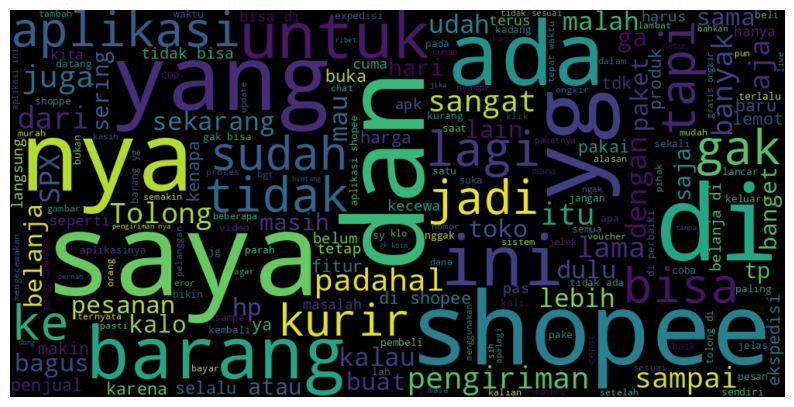

In [33]:
all_text =' '.join(my_df['content'])

# Membuat Wordcloud
wordcloud = WordCloud(width=1000, height=500, max_font_size=150, random_state=43).generate(all_text)

# Menampilkan wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [34]:
print('\n',all_text)


 Aplikasi ini Sangat membantu aku yg GK bisa belanja keluar rumah karna satu alasan tertentu. Cuma bingung gimana cara menghubungkan no wa ke aplikasi shopee ini. Kurir baru yg GK tau alamatku jadi kerepotan,ujung2nya paket dikembalikan kepenjual sampai 2 kali. Klo sampai gagal kirim 3 kali kan gak bisa cod. sering banget belanja di shopee selain barang nya banyak yg ORI atau kw super ,pelayanan juga cepat estimasi pengiriman juga sesuai kadang lebih cepat gimana reseller nya juga sih selama ini saya puas belanja di shopee banyak voucher gratis ongkir dan diskon di berbagai produknya Shopee pelit gajelas, udah belanja berkali-kali mala gabisa klaim koin. pengiriman lama setelah sampai kurir tolol gamau telpon tiba-tiba di retur sepihak. perlu di perbaiki ni apk min kenapa beberapa hari ini aplikasi saya ga keluar gambarnya, udh di update juga padahal. terus masih positif thinking kalau cuma kendala di hp saya, terus nyoba cek di hp lain ternyata sama aja ga keluar gambar juga Saya san

# PELABELAN

In [35]:
def pelabelan(score):
  if score <= 3:
    return 'Negatif'
  elif score == 4 :
    return 'Positif'
  elif score == 5 :
    return 'Positif'
my_df['Label'] = my_df ['score'].apply(pelabelan)
my_df.head()

,content,score,Label
4,Aplikasi ini Sangat membantu aku yg GK bisa be...,5,Positif
31,sering banget belanja di shopee selain barang ...,5,Positif
84,"Shopee pelit gajelas, udah belanja berkali-kal...",1,Negatif
78,min kenapa beberapa hari ini aplikasi saya ga ...,1,Negatif
1,Saya sangat senang belanja di shopee.tapi akhi...,1,Negatif


In [36]:
# save menjadi file csv
my_df.to_csv("scrapped_data.csv", index = False)

# pembersihan data
# data cleaning

In [37]:
import pandas as pd
pd.set_option('display.max_columns', None)
my_df = pd.read_csv('/content/scrapped_data.csv')
my_df.head()

,content,score,Label
0,Aplikasi ini Sangat membantu aku yg GK bisa be...,5,Positif
1,sering banget belanja di shopee selain barang ...,5,Positif
2,"Shopee pelit gajelas, udah belanja berkali-kal...",1,Negatif
3,min kenapa beberapa hari ini aplikasi saya ga ...,1,Negatif
4,Saya sangat senang belanja di shopee.tapi akhi...,1,Negatif


In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# untuk menampilkan informasi detail tentang dataframe
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  200 non-null    object
 1   score    200 non-null    int64 
 2   Label    200 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [40]:
#Tampilkan setiap baris yang memiliki nilai null (NaN) pada kolom
my_df.isna()

,content,score,Label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
195,False,False,False
196,False,False,False
197,False,False,False
198,False,False,False


In [41]:
my_df.isna().any()

,0
content,False
score,False
Label,False


In [42]:
my_df.describe()

,score
count,200.000000
mean,2.465000
std,1.692067
min,1.000000
25%,1.000000
50%,2.000000
75%,4.250000
max,5.000000


In [43]:
#mencari jumlah baris data yang bernilai null
my_df.isnull().sum()

,0
content,0
score,0
Label,0


# 1. Handling Missing value-Ignore tuple


In [44]:
my_df.dropna(subset=['Label'],inplace = True)

In [45]:
my_df.isnull().sum()

,0
content,0
score,0
Label,0


In [46]:
my_df.head()

,content,score,Label
0,Aplikasi ini Sangat membantu aku yg GK bisa be...,5,Positif
1,sering banget belanja di shopee selain barang ...,5,Positif
2,"Shopee pelit gajelas, udah belanja berkali-kal...",1,Negatif
3,min kenapa beberapa hari ini aplikasi saya ga ...,1,Negatif
4,Saya sangat senang belanja di shopee.tapi akhi...,1,Negatif


In [47]:
#simpan hasil file data cleaning dengan nama shopeepreprocessing.csv
my_df.to_csv("shopeepreprocessing.csv", index = False)

# Text PreProcessing

In [48]:
import pandas as pd
df = pd.read_csv('/content/shopeepreprocessing.csv')
df.head()

,content,score,Label
0,Aplikasi ini Sangat membantu aku yg GK bisa be...,5,Positif
1,sering banget belanja di shopee selain barang ...,5,Positif
2,"Shopee pelit gajelas, udah belanja berkali-kal...",1,Negatif
3,min kenapa beberapa hari ini aplikasi saya ga ...,1,Negatif
4,Saya sangat senang belanja di shopee.tapi akhi...,1,Negatif


# Case Folding
Proses case folding adalah proses mengubah seluruh huruf menjadi huruf kecil. Pada proses ini karakter-karakter 'A'-'Z' yang terdapat pada data diubah kedalam karakter 'a'-'z'.

In [49]:
import re
def  clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # remove numbers
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return my_df

In [50]:
my_df['text_clean'] = my_df['content'].str.lower()
my_df['text_clean']
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head()


,content,score,Label,text_clean
0,Aplikasi ini Sangat membantu aku yg GK bisa be...,5,Positif,aplikasi ini sangat membantu aku yg gk bisa be...
1,sering banget belanja di shopee selain barang ...,5,Positif,sering banget belanja di shopee selain barang ...
2,"Shopee pelit gajelas, udah belanja berkali-kal...",1,Negatif,shopee pelit gajelas udah belanja berkalikali ...
3,min kenapa beberapa hari ini aplikasi saya ga ...,1,Negatif,min kenapa beberapa hari ini aplikasi saya ga ...
4,Saya sangat senang belanja di shopee.tapi akhi...,1,Negatif,saya sangat senang belanja di shopeetapi akhir...


# Stopword Removal
Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll. Makna di balik penggunaan stopword yaitu dengan menghapus kata-kata yang memiliki informasi rendah dari sebuah teks, kita dapat fokus pada kata-kata penting sebagai gantinya.

In [51]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
data_clean['text_StopWord'] = data_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,content,score,Label,text_clean,text_StopWord
0,Aplikasi ini Sangat membantu aku yg GK bisa be...,5,Positif,aplikasi ini sangat membantu aku yg gk bisa be...,aplikasi membantu yg gk belanja rumah karna al...
1,sering banget belanja di shopee selain barang ...,5,Positif,sering banget belanja di shopee selain barang ...,banget belanja shopee barang nya yg ori kw sup...
2,"Shopee pelit gajelas, udah belanja berkali-kal...",1,Negatif,shopee pelit gajelas udah belanja berkalikali ...,shopee pelit gajelas udah belanja berkalikali ...
3,min kenapa beberapa hari ini aplikasi saya ga ...,1,Negatif,min kenapa beberapa hari ini aplikasi saya ga ...,min aplikasi ga gambarnya udh update positif t...
4,Saya sangat senang belanja di shopee.tapi akhi...,1,Negatif,saya sangat senang belanja di shopeetapi akhir...,senang belanja shopeetapi akhirna kecewa dgn e...


# Tokenizing
Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token. Didalam NLP, token diartikan sebagai “kata” meskipun tokenize juga dapat dilakukan pada paragraf maupun kalimat

In [54]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_clean.head()


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,content,score,Label,text_clean,text_StopWord,text_tokens
0,Aplikasi ini Sangat membantu aku yg GK bisa be...,5,Positif,aplikasi ini sangat membantu aku yg gk bisa be...,aplikasi membantu yg gk belanja rumah karna al...,"[aplikasi, membantu, yg, gk, belanja, rumah, k..."
1,sering banget belanja di shopee selain barang ...,5,Positif,sering banget belanja di shopee selain barang ...,banget belanja shopee barang nya yg ori kw sup...,"[banget, belanja, shopee, barang, nya, yg, ori..."
2,"Shopee pelit gajelas, udah belanja berkali-kal...",1,Negatif,shopee pelit gajelas udah belanja berkalikali ...,shopee pelit gajelas udah belanja berkalikali ...,"[shopee, pelit, gajelas, udah, belanja, berkal..."
3,min kenapa beberapa hari ini aplikasi saya ga ...,1,Negatif,min kenapa beberapa hari ini aplikasi saya ga ...,min aplikasi ga gambarnya udh update positif t...,"[min, aplikasi, ga, gambarnya, udh, update, po..."
4,Saya sangat senang belanja di shopee.tapi akhi...,1,Negatif,saya sangat senang belanja di shopeetapi akhir...,senang belanja shopeetapi akhirna kecewa dgn e...,"[senang, belanja, shopeetapi, akhirna, kecewa,..."


# Stemming
Stemming adalah proses pemetaan dan penguraian bentuk dari suatu kata menjadi bentuk kata dasarnya. Untuk melakukan stemming bahasa Indonesia kita dapat menggunakan library Python Sastrawi yang sudah kita siapkan di awal. Library Sastrawi menerapkan Algoritma Nazief dan Adriani dalam melakukan stemming bahasa Indonesia.

In [55]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00


In [56]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [57]:

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]


data_clean['text_steamindo'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head()

1900
------------------------
1 : aplikasi : aplikasi
2 : membantu : bantu
3 : yg : yg
4 : gk : gk
5 : belanja : belanja
6 : rumah : rumah
7 : karna : karna
8 : alasan : alas
9 : bingung : bingung
10 : gimana : gimana
11 : menghubungkan : hubung
12 : no : no
13 : wa : wa
14 : shopee : shopee
15 : kurir : kurir
16 : tau : tau
17 : alamatku : alamat
18 : kerepotanujungnya : kerepotanujungnya
19 : paket : paket
20 : dikembalikan : kembali
21 : kepenjual : jual
22 : kali : kali
23 : klo : klo
24 : gagal : gagal
25 : kirim : kirim
26 : gak : gak
27 : cod : cod
28 : banget : banget
29 : barang : barang
30 : nya : nya
31 : ori : ori
32 : kw : kw
33 : super : super
34 : pelayanan : layan
35 : cepat : cepat
36 : estimasi : estimasi
37 : pengiriman : kirim
38 : sesuai : sesuai
39 : kadang : kadang
40 : reseller : reseller
41 : sih : sih
42 : puas : puas
43 : voucher : voucher
44 : gratis : gratis
45 : ongkir : ongkir
46 : diskon : diskon
47 : produknya : produk
48 : pelit : pelit
49 : gajelas : 

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,Aplikasi ini Sangat membantu aku yg GK bisa be...,5,Positif,aplikasi ini sangat membantu aku yg gk bisa be...,aplikasi membantu yg gk belanja rumah karna al...,"[aplikasi, membantu, yg, gk, belanja, rumah, k...",aplikasi bantu yg gk belanja rumah karna alas ...
1,sering banget belanja di shopee selain barang ...,5,Positif,sering banget belanja di shopee selain barang ...,banget belanja shopee barang nya yg ori kw sup...,"[banget, belanja, shopee, barang, nya, yg, ori...",banget belanja shopee barang nya yg ori kw sup...
2,"Shopee pelit gajelas, udah belanja berkali-kal...",1,Negatif,shopee pelit gajelas udah belanja berkalikali ...,shopee pelit gajelas udah belanja berkalikali ...,"[shopee, pelit, gajelas, udah, belanja, berkal...",shopee pelit gajelas udah belanja berkalikali ...
3,min kenapa beberapa hari ini aplikasi saya ga ...,1,Negatif,min kenapa beberapa hari ini aplikasi saya ga ...,min aplikasi ga gambarnya udh update positif t...,"[min, aplikasi, ga, gambarnya, udh, update, po...",min aplikasi ga gambar udh update positif thin...
4,Saya sangat senang belanja di shopee.tapi akhi...,1,Negatif,saya sangat senang belanja di shopeetapi akhir...,senang belanja shopeetapi akhirna kecewa dgn e...,"[senang, belanja, shopeetapi, akhirna, kecewa,...",senang belanja shopeetapi akhirna kecewa dgn e...


In [ ]:
# simpan hasil text preprocessing ke file csv
data_clean.to_csv('hasil_TextPreProcessing_shopee.csv', index= False)

In [ ]:
data_clean.info()

In [ ]:
# import library re, kemudian kita lakukan praproses
import re
def praproses(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

spliting data

memecah data test 20% dari keseluruhan data

In [ ]:
#membagi data menjadi data training dan testing dengan test_size = 0.20 dan random state nya 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean['content'], data_clean['Label'],
                                                    test_size = 0.20,
                                                    random_state = 0)

pembobotan tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

In [ ]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(tfidf_train, y_train)


In [ ]:
X_train.toarray()

In [ ]:
y_pred = nb.predict(tfidf_test)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:", accuracy_score(y_test,predicted))
print("MultinomialNB Precision:", precision_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB Recall:", recall_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB f1_score:", f1_score(y_test,predicted, average="binary", pos_label="Negatif"))
print('\n')
print(f'confusion_matrix:\n {confusion_matrix(y_test, predicted)}')
print('\n')
print(classification_report(y_test, predicted, zero_division=0))

# Load dataset
data_clean = pd.read_csv('hasil_TextPreProcessing_shopee.csv')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, predicted)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negatif", "Positif"], yticklabels=["Negatif", "Positif"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Inputan untuk prediksi
input_text = input("Masukkan kata atau kalimat untuk diprediksi: ")
input_vectorized = vectorizer.transform([input_text])
prediction = clf.predict(input_vectorized)

# Output prediksi
print(f'Prediksi: {prediction[0]}')

In [ ]:
all_text =' '.join(data_clean['content'])

# Membuat Wordcloud
wordcloud = WordCloud(width=1000, height=500, max_font_size=150, random_state=43).generate(all_text)

# Menampilkan wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Pisahkan data menjadi positif dan negatif
data_positif = data_clean[data_clean['Label'] == 'Positif']
data_negatif = data_clean[data_clean['Label'] == 'Negatif']

# Konversi teks menjadi satu string
teks_positif = ' '.join(data_positif['content'])
teks_negatif = ' '.join(data_negatif['content'])

In [ ]:
# Buat WordCloud untuk positif
wordcloud_positif = WordCloud(width=800, height=800, background_color='white').generate(teks_positif)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.title('WordCloud Positif')
plt.axis('off')
plt.show()

In [ ]:
# Buat WordCloud untuk negatif
wordcloud_negatif = WordCloud(width=800, height=800, background_color='white').generate(teks_negatif)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.title('WordCloud Negatif')
plt.axis('off')
plt.show()